In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
bias = 200
X, y, coef = make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)


In [3]:
X.shape, y.shape

((100, 1), (100,))

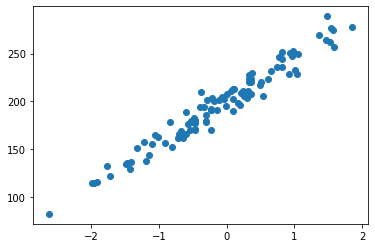

In [4]:
plt.scatter(X, y)

In [5]:
coef, bias # here i have m and c from sklearn

(array(41.74110031), 200)

In [7]:
y_gen = X * coef + bias # equation of line


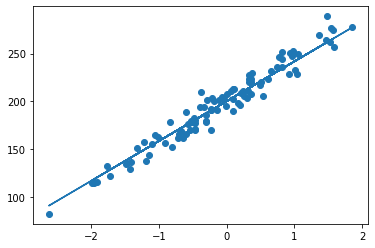

In [8]:
plt.scatter(X, y)
plt.plot(X, y_gen)



In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)
# work during training? figuring out coef & intercept



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_, model.intercept_

(array([44.43716999]), 201.16511532052695)

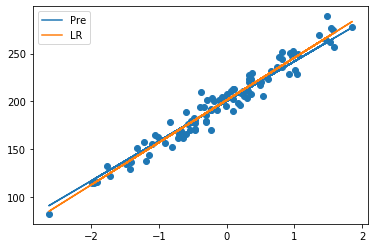

In [13]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

In [14]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [15]:
model = LinearRegCustom(lr=.1)

In [16]:
errors = model.fit(X, y)

In [17]:
model.coef_, model.intercept_

(42.737103848911794, 199.66178066597934)

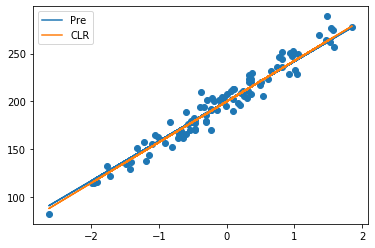

In [18]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

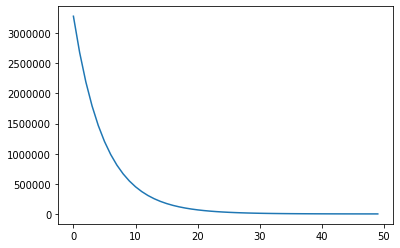

In [19]:
plt.plot(errors)

In [20]:
# for i in range(1, 10):
#     model = LinearRegCustom(lr=.5 * i)
#     errors = model.fit(X, y)
    
#     plt.figure()
    
#     plt.title(str(.5 * i))
#     plt.plot(errors)


In [21]:


from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split



In [22]:
X, y = load_boston(return_X_y=True)

In [23]:
boston = load_boston()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [25]:


model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:


model.predict(X_test[:1])



array([28.53469469])

In [27]:


X_test[:1]



array([[9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]])

In [28]:
dataset = pd.read_csv("Salary_Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test[:5])
y_test[:5]
model.score(X_test, y_test)


yrs = int(input("How many yrs of experience do you have: "))
sal = model.predict(np.array([yrs]).reshape(-1, 1))
print("\nYour estimated salary is $", round(sal[0], 3))






FileNotFoundError: [Errno 2] File b'Salary_Data.csv' does not exist: b'Salary_Data.csv'